In [8]:
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('text',usetex=True)
plt.rc('lines',linewidth=2.3)
plt.rc('legend',fontsize=10)
plt.rc('mathtext',fontset='cm')
plt.rc('font',**{'family':'serif','serif':['Helvetica'],'size':10})

print('Done')

Done


In [9]:
#This is where the first-order ODE-solving routines are written
#This was originally written in Python 2. Disclaimer if you run it with Python 3.

fs=25     #Plot font size
lwidth=2  #Plot line width

#All method implemented here require at least:
# ini: the initial value y(x=0)
# func: the functional form of the deriviative such that y' = func(x,y)
# h: the step size
# xfin: Sets the interval of integration. y(x) will be computed from x=0 to x=xfin.

#Implicit methods further require:
# tol: the convergence tolerance in the fixed-point iteration self-consistency loop.

#Implementation of naive forward-Euler method
def euler(ini, func, h, xfin):                   
    NSTEPS=int(np.rint(xfin/np.float(h))+1)
    x=[]
    y=[]
    
    x.append(0)
    y.append(ini)
    
    for k in range(1,NSTEPS):
        xi=x[k-1]+h
        x.append(xi)
                
        yi=y[k-1]+h*func(x[k-1],y[k-1])
        y.append(yi)
        

    plt.plot(x,y,linewidth=lwidth,label='Euler')
    plt.xlabel('x',fontsize=fs)
    plt.ylabel('y',fontsize=fs)
        
    return x,y

#Implementation of the implicit backward-Euler method
def euler_back(ini, func, h, xfin, tol):    
    NSTEPS=int(np.rint(xfin/np.float(h))+1)
    x=[]
    y=[]
    
    x.append(0)
    y.append(ini)
    
    for k in range(1,NSTEPS):
        xi=x[k-1]+h
        x.append(xi)
                
        yi=y[k-1]
        n=0
        
        #This is the self-consistency loop required in any implicit ODE solver.
        #This implementation uses fixed-point iteration - other approaches exist.
        while (np.abs(yi-(y[k-1]+h*func(xi,yi)) ))>tol and n<5000:
            yi=y[k-1]+h*func(xi,yi)
            n+=1
        y.append(yi)
        

    plt.plot(x,y,linewidth=lwidth,label='Back-Euler')
    plt.xlabel('x',fontsize=fs)
    plt.ylabel('y',fontsize=fs)
        
    return x,y

#Implementation of the implicit trapezoidal method
#This is the simplest nontrivial example of an Adams-Moulton method
def trapezoidal(ini, func, h, xfin, tol):
    NSTEPS=int(np.rint(xfin/np.float(h))+1)
    x=[]
    y=[]
    
    x.append(0)
    y.append(ini)
    
    for k in range(1,NSTEPS):
        xi=x[k-1]+h
        x.append(xi)
                
        yold=y[k-1]
        ynew=y[k-1]+0.5*h*(func(xi,yold) +  func(x[k-1],y[k-1]) )
        
        n=0
        while (np.abs(yold-ynew))>tol and n<5000:
            yold=ynew
            ynew=y[k-1]+0.5*h*(func(xi,yold)+func(x[k-1],y[k-1]))
            n+=1
        
        yi=ynew
        y.append(yi)
        

    plt.plot(x,y,linewidth=lwidth,label='Trapezoid')
    plt.xlabel('x',fontsize=fs)
    plt.ylabel('y',fontsize=fs)
        
    return x,y

#Implementation of the 2-step Adams-Bashforth method
def adams_bashforth(ini, func, h, xfin):
    NSTEPS=int(np.rint(xfin/np.float(h))+1)
    x=[]
    y=[]
    
    x.append(0)
    y.append(ini)
    
    x.append(h)
    y.append(ini+h*func(0,ini))
    
    for k in range(2,NSTEPS):
        xi=x[k-1]+h
        x.append(xi)
                
        yi=y[k-1]+1.5*h*func(x[k-1],y[k-1])-0.5*h*func(x[k-2],y[k-2])
        y.append(yi)
        
    plt.plot(x,y,linewidth=lwidth,label='Adams-Bashforth')
    plt.xlabel('x',fontsize=fs)
    plt.ylabel('y',fontsize=fs)
        
    return x,y
    

#Implementation of the midpoint method
#This is like an "RK2" method - a second-order Runge-Kutta
def midpoint(ini, func, h, xfin):
    NSTEPS=int(np.rint(xfin/np.float(h))+1)
    x=[]
    y=[]
    
    x.append(0)
    y.append(ini)
    
    for k in range(1,NSTEPS):
        xi=x[k-1]+h
        x.append(xi)
                
        yi=y[k-1]+h*func(x[k-1]+0.5*h,y[k-1]+0.5*h*func(x[k-1],y[k-1],1))
        y.append(yi)
        

    plt.plot(x,y,linewidth=lwidth,label='Midpoint')
    plt.xlabel('x',fontsize=fs)
    plt.ylabel('y',fontsize=fs)
        
    return x,y

#Implementation of the 4th-order Runge-Kutta
def RK4(ini, func, h, xfin):
    NSTEPS=int(np.rint(xfin/np.float(h))+1)
    x=[]
    y=[]
    
    x.append(0)
    y.append(ini)
    
    for k in range(1,NSTEPS):
        xi=x[k-1]+h
        x.append(xi)
        
        k1=func(x[k-1],y[k-1])
        k2=func(x[k-1]+h/2,y[k-1]+h/2*k1)
        k3=func(x[k-1]+h/2,y[k-1]+h/2*k2)
        k4=func(x[k-1]+h,y[k-1]+h*k3)
                
        yi=y[k-1]+(h/6)*(k1+2*k2+2*k3+k4)
        y.append(yi)
        
    
    plt.plot(x,y,linewidth=lwidth,label='RK4')
    plt.xlabel('x',fontsize=fs)
    plt.ylabel('y',fontsize=fs)
        
    return x,y

#Implementation of the explicit "predictor-corrector" (PC) trapezoidal method
#This uses an Euler step to "predict" the value of y_n+1, and avoid making the method implicit
#This makes the method both cheaper and less accurate than the full implicit trapzoidal method.
def trapezoidal_PC(ini, func, h, xfin):  

    NSTEPS=int(np.rint(xfin/np.float(h))+1)
    x=[]
    y=[]
    
    x.append(0)
    y.append(ini)
    
    for k in range(1,NSTEPS):
        xi=x[k-1]+h
        x.append(xi)
        
        y_pre=y[k-1]+h*func(x[k-1],y[k-1])
                
        yi=y[k-1]+0.5*h*(func(x[k-1],y[k-1])+func(x[k-1]+h, y_pre))
        y.append(yi)
        

    plt.plot(x,y,linewidth=lwidth,label='Trapezoid-PC')
    plt.xlabel('x',fontsize=fs)
    plt.ylabel('y',fontsize=fs)
        

    return x,y

#Implementation of the exponential integration technique.
#This method requires an ODE of the form: y' = -A y + N(y)
#Note that the value of A must be input by the user in this implementation.
def exponential(ini, func, h, xfin, A):
    NSTEPS=int(np.rint(xfin/np.float(h))+1)
    x=[]
    y=[]
        
    x.append(0)
    y.append(ini)
    for k in range(1,NSTEPS):
        xi=x[k-1]+h
        x.append(xi)

        #This implementation computes the value of N(y) at each step given the previous value of y,
        #the value of A, and the value of the derivative at the previous point.
        N=func(x[k-1],y[k-1])+A*y[k-1]
                
        yi=np.exp(-A*h)*y[k-1]+(A**(-1))*(1-np.exp(-A*h))*N
        y.append(yi)
        

    plt.plot(x,y,linewidth=lwidth,label='Exp.')
    plt.xlabel('x',fontsize=fs)
    plt.ylabel('y',fontsize=fs)

    return x,y

print('Done')

Done


Done


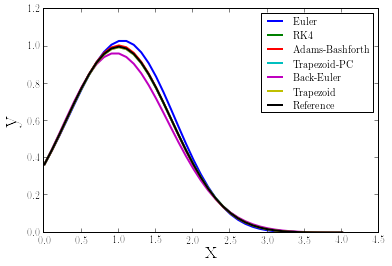

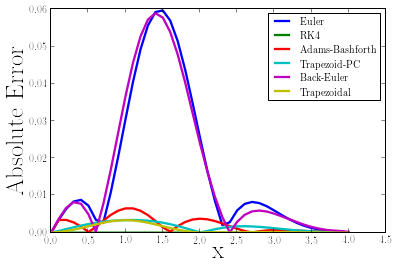

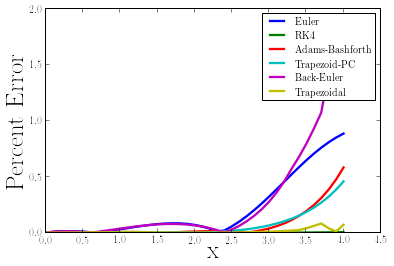

In [10]:
#This is where the first-order differential equation to be solved is input, and where the execution occurs

def plot_error(x,y_ref,y_num,lab):
    
    #Requires:
    # x: array of x values over which we have integrated
    # y_ref: array of y-values taken from the exact analytic answer
    # y_num: numerical solution to the ODE
    # lab: name of the ODE method used (string)
    
    #Compute the absolute error between the numerical output and the analytic exact answer.
    err=np.abs(np.array(y_ref)-np.array(y_num))
    
    fs=25
    lwidth=2

    #Plot the absolute error of the numerical solution from the exact answer.
    plt.figure(2)
    plt.plot(x,err,label=lab)
    plt.legend(loc='upper right')
    plt.xlabel('x',fontsize=fs)
    plt.ylabel('Absolute Error',fontsize=fs)
    

    #Plot the percentage error in the numerical solution.
    plt.figure(3)
    plt.plot(x,np.array(err)/np.array(y_ref),label=lab)
    plt.legend(loc='upper right')
    plt.xlabel('x',fontsize=fs)
    plt.ylabel('Percent Error',fontsize=fs)


    
#This is the where you input the first-order ODE to be solved
def deriv(x,y):      
    derivative=-2*(x-1)*y      #The user changes the input ODE by chaning this line
    return derivative
   
    
#Chose where to integrate to: from x=0 to x=xfin
xfin=4

#Chose your initial condiiton: y(x=0)=yini
yini=((np.e)**(-1))

#Change your step-size here
h=0.1

#Explicit solvers
x,y_euler=euler(yini, deriv, h, xfin)
x,y_RK4=RK4(yini, deriv, h, xfin)
x,y_ab=adams_bashforth(yini, deriv, h, xfin)
x,y_trapezoidal_pc=trapezoidal_PC(yini, deriv, h, xfin)

#Remember that to use exponential integration, your ODE must be in the form: y' = -A*y + N(y)
#The value of A must be input by the user.
#A=-1                                            
#x,y_exp=exponential(yini, deriv, h, xfin, A)

#Implicit Solvers
#These require a user-input tolerance for the self-consistency loop
# You often want tol as a function of h - carelessness about the tol/h ratio can cause these methods to fail.
tol=0.001*h
x,y_euler_back=euler_back(yini, deriv, h, xfin, tol)
x,y_trapezoidal=trapezoidal(yini, deriv, h, xfin, tol)


#Plot the analytical solution to the ODE for reference
xr=np.array(x)
yr=np.exp(-(xr-1)**2)

ls=2
plt.plot(xr,yr,label='Reference',linewidth=ls)
plt.legend(loc='upper right')

#Explicit Solver Errors
plot_error(x,yr,y_euler,'Euler')
plot_error(x,yr,y_RK4,'RK4')
plot_error(x,yr,y_ab,'Adams-Bashforth')
plot_error(x,yr,y_trapezoidal_pc,'Trapezoid-PC')

#Exponential Sovler Errors
#plot_error(x,yr,y_exp,'Exp.')

#Implicit Solver Errors
plot_error(x,yr,y_euler_back,'Back-Euler')
plot_error(x,yr,y_trapezoidal,'Trapezoidal')

#plt.axis([0.0,4.5,-0.01,0.07])

print('Done')